Residual Error: 17.28


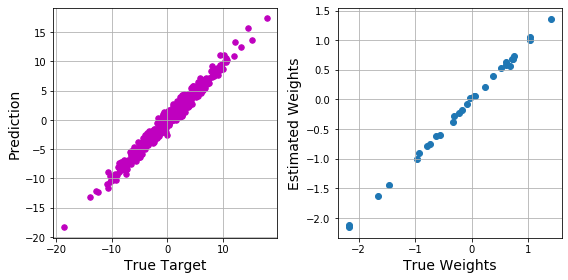

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Number of data and dimensions
#
N, p = 500, 30
# Input data (covariates)
#
X = np.random.randn(N, p)
# True parameters
#
wTrue = np.random.randn(p, 1)
# Set up targets (response)
#
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)  # The X multiply by parameter plus noise
# Estimate the weights by pseudo inverse
#
wEst = np.linalg.inv(X.T @ X) @ X.T @ yTarget
# Predict from the model
#
yEst = X @ wEst
# Scatter plot of predictions against truth
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].scatter(yTarget, yEst, c='m', s=30)
ax[0].grid(True)
ax[0].set_xlabel("True Target", fontsize=14)
ax[0].set_ylabel("Prediction", fontsize=14)
ax[1].scatter(wTrue, wEst)
ax[1].grid(True)
ax[1].set_xlabel("True Weights", fontsize=14)
ax[1].set_ylabel("Estimated Weights", fontsize=14)
plt.tight_layout()
# Error from the model
#
print("Residual Error: %3.2f" %(np.linalg.norm(yEst - yTarget)))

**Linear Regression(Gradient Descent)**

Residual Error (Initial) : 174.70
Residual Error (Converged): 17.66


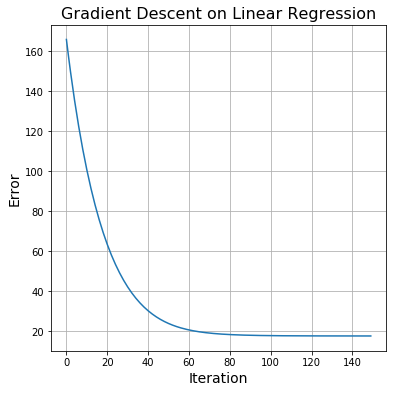

In [3]:
# Set up synthetic data
#
N, p = 500, 30
X = np.random.randn(N, p)
wTrue = np.random.randn(p, 1)
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)
# Initial guess and error
#
w0 = np.random.randn(p,1)
E0 = np.linalg.norm(yTarget - X @ w0)
# Parameters for gradient descent
#
MaxIter = 150
lRate = 0.0001
Eplot = np.zeros((MaxIter, 1))
wIter= w0
for iter in range(MaxIter):
  wIter = wIter - lRate * X.T @ (X @ wIter - yTarget)
  Eplot[iter] = np.linalg.norm(X @ wIter - yTarget)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(Eplot)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Error", fontsize=14)
ax.grid(True)
ax.set_title("Gradient Descent on Linear Regression",
fontsize=16)
print("Residual Error (Initial) : %3.2f" %(E0))
print("Residual Error (Converged): %3.2f"
%(np.linalg.norm(X @ wIter - yTarget)))
plt.savefig("GDLearningCurve.png")


**Linear Regression(Stochastic gradient descent)**

208.73130953924922
50.13112956463085


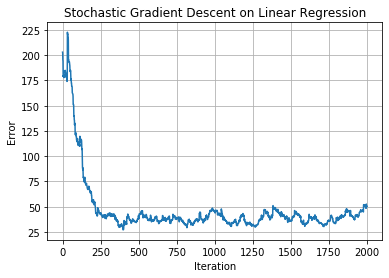

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Number of data and dimensions
#
N, p = 500, 30
# Input data (covariates)
#
X = np.random.randn(N, p)
# True parameters
#
wTrue = np.random.randn(p, 1)
# Set up targets (response)
#
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)
w0 = np.random.randn(p,1)
E5 = yTarget - X @ w0
E0 = np.linalg.norm(yTarget - X @ w0)
# print(E5)
print(E0)
MaxIter = 2000
lRate = 0.05
Eplot = np.zeros((MaxIter, 1))
wIter= w0
for iter in range(MaxIter):
  j = np.floor(np.random.rand()*N).astype(int)
  xj = X[j,:]
  xj = np.array([X[j,:]]).T
  yj = yTarget[j,:]
  yPred = xj.T @ wIter
  wIter = wIter - lRate * (yPred - yj) * xj
  Eplot[iter] = np.linalg.norm(yTarget - X @ wIter)

print(np.linalg.norm(yTarget - X @ wIter))
fig, ax = plt.subplots()
ax.plot(Eplot)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
ax.grid(True)
ax.set_title("Stochastic Gradient Descent on Linear Regression")
plt.savefig("SGDLearningCurve.png")


**Mini batch gradient descent**

In [0]:
def cal_cost(theta,X,y):
    cost = np.linalg.norm(y - X @ theta)
    return cost

In [0]:
def minibatch_gradient_descent(X,y,theta,learning_rate, iterations, batch_size):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            # X_i = np.c_[np.ones(len(X_i)),X_i]
            prediction = np.dot(X_i,theta)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)/batch_size
        cost_history[it]  = cost
    return theta, cost_history

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Number of data and dimensions
#
N, p = 500, 30
# Input data (covariates)
#
X = np.random.randn(N, p)
# True parameters
#
wTrue = np.random.randn(p, 1)
# Set up targets (response)
#
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)
w0 = np.random.randn(p,1)
theta = w0
MaxIter = 2000
lRate = 0.05
batch_size = 10
theta,cost_history = minibatch_gradient_descent(X,yTarget,theta,lRate,MaxIter,batch_size)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          1.143,
Theta1:          -0.471
Final cost/MSE:  11.538


In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Number of data and dimensions
#
N, p = 500, 30
# Input data (covariates)
#
X = np.random.randn(N, p)
# True parameters
#
wTrue = np.random.randn(p, 1)
# Set up targets (response)
#
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)
w0 = np.random.randn(p,1)
theta2 = w0
MaxIter = 2000
lRate = 0.05
batch_size = 50
theta2,cost_history2 = minibatch_gradient_descent(X,yTarget,theta2,lRate,MaxIter,batch_size)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta2[0][0],theta2[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history2[-1]))

Theta0:          0.213,
Theta1:          1.621
Final cost/MSE:  1.130


In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Number of data and dimensions
#
N, p = 500, 30
# Input data (covariates)
#
X = np.random.randn(N, p)
# True parameters
#
wTrue = np.random.randn(p, 1)
# Set up targets (response)
#
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)
w0 = np.random.randn(p,1)
theta3 = w0
MaxIter = 2000
lRate = 0.05
batch_size = 100
theta3,cost_history3 = minibatch_gradient_descent(X,yTarget,theta3,lRate,MaxIter,batch_size)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta3[0][0],theta3[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history3[-1]))

Theta0:          0.160,
Theta1:          -0.068
Final cost/MSE:  0.394


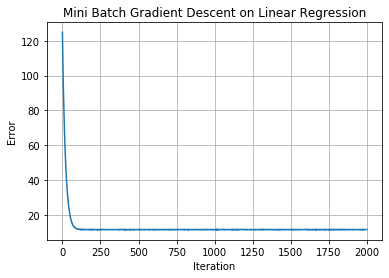

In [39]:
fig, ax = plt.subplots()
ax.plot(cost_history)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
ax.grid(True)
ax.set_title("Mini Batch Gradient Descent on Linear Regression")
plt.savefig("MBGDLearningCurve.png")

**Mini batch gradient descent on different batch size**

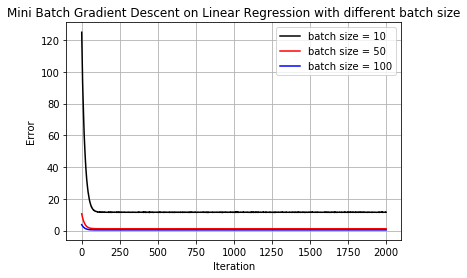

In [37]:
# fig, ax = plt.subplots()
# ax.plot(cost_history,c = 'b')
# ax.plot(cost_history2,c = 'r')
# ax.plot(cost_history3, c = 'g')
# ax.set_xlabel("Iteration")
# ax.set_ylabel("Error")
# ax.grid(True)
# ax.legend(True)
# ax.set_title("Mini Batch Gradient Descent on Linear Regression")
# plt.savefig("MBGDLearningCurve.png")

Y1 = cost_history
Y2 = cost_history2
Y3 = cost_history3
X = []
for i in range(2000):
    X.append(i)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Mini Batch Gradient Descent on Linear Regression with different batch size")
plt.plot(X, Y1, c='k', linestyle='-')
plt.plot(X, Y2, c='r', linestyle='-')
plt.plot(X, Y3, c='b', linestyle='-')
plt.grid(True)
plt.legend(["batch size = 10", "batch size = 50", "batch size = 100"])
plt.show()

**Recursive least squares**

In [0]:
def RLS(lamda,X,y,N,p):
  Eplot = np.zeros((N, 1))
  pn = 100 * np.identity(p)
  kn = np.random.rand(p,1)
  omega = np.random.randn(p,1)
  for i in range(X.shape[0]):
    tempX = X[i,:].reshape(-1,1)
    tempy = y[i]
    k = ((1/lamda) * pn @ tempX) / (1 + (1/lamda) * tempX.T @ pn @ tempX)
    e = omega.T @ tempX-tempy 
    omega = omega - k * e
    pn = (1/lamda) * pn - (1/lamda) * k @ tempX.T @ pn
    Eplot[i] = np.linalg.norm(y - X @ omega)
  fig, ax = plt.subplots()
  ax.plot(Eplot)
  ax.set_xlabel("Iteration")
  ax.set_ylabel("Error")
  ax.grid(True)
  ax.set_title("Recursive linear squares on Linear Regression")
  plt.savefig("RLSLearningCurve.png")

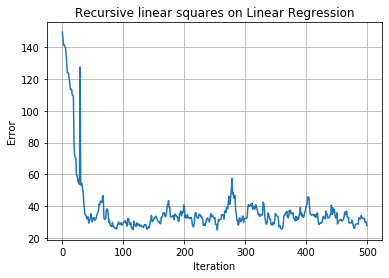

In [10]:
N, p = 500, 30 #Increse the dimension p will make the plot more rough
# Input data (covariates)
#
X = np.random.randn(N, p)
# True parameters
#
wTrue = np.random.randn(p, 1)
# Set up targets (response)
#
yTarget = X @ wTrue + 0.8*np.random.randn(N,1)
w0 = np.random.randn(p,1)

RLS(0.9,X,yTarget,N,p)

**RLS on real data set**

In [0]:
def RLS2(lamda,X,y,N,p,Xtest,ytest):
  Eplot = np.zeros((N, 1))
  pn = 100 * np.identity(p)
  kn = np.random.rand(p,1)
  omega = np.random.randn(p,1)
  for i in range(X.shape[0]):
    tempX = X[i,:].reshape(-1,1)
    tempy = y[i]
    k = ((1/lamda) * pn @ tempX) / (1 + (1/lamda) * tempX.T @ pn @ tempX)
    e = omega.T @ tempX-tempy 
    omega = omega - k * e
    pn = (1/lamda) * pn - (1/lamda) * k @ tempX.T @ pn
    Eplot[i] = np.linalg.norm(ytest - Xtest @ omega)
  fig, ax = plt.subplots()
  ax.plot(Eplot)
  ax.set_xlabel("Iteration")
  ax.set_ylabel("Error")
  ax.grid(True)
  ax.set_title("Recursive linear squares on Linear Regression of Boston dataset")
  plt.savefig("RLSLearningCurve(Boston data).png")

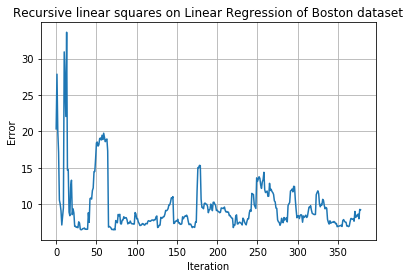

In [13]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
dataset = load_boston()
X_train,X_test,y_train,y_test = train_test_split(dataset.data,dataset.target,test_size=0.25,random_state=33)
ss_X = StandardScaler()
ss_y = StandardScaler()
X = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)
yTarget = ss_y.fit_transform(y_train.reshape(-1,1))
y_test = ss_y.transform(y_test.reshape(-1,1))
RLS2(0.9,X,yTarget,X.shape[0],X.shape[1],X_test,y_test)

**Stochastic gradient descent on real dataset**

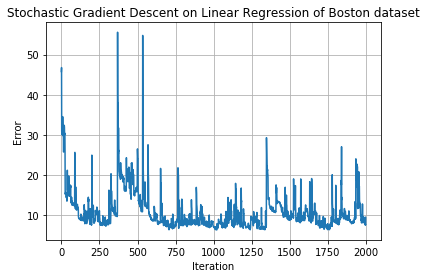

In [15]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
dataset = load_boston()
X_train,X_test,y_train,y_test = train_test_split(dataset.data,dataset.target,test_size=0.25,random_state=33)
ss_X = StandardScaler()
ss_y = StandardScaler()
X = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)
yTarget = ss_y.fit_transform(y_train.reshape(-1,1))
y_test = ss_y.transform(y_test.reshape(-1,1))
N = X.shape[0]
p = X.shape[1]
# print("X shape is:", X.shape)
# print("y shape is:", yTarget.shape)
w0 = np.random.randn(p,1)
MaxIter = 2000
lRate = 0.05
Eplot2 = np.zeros((MaxIter, 1))
wIter= w0
for iter in range(MaxIter):
  j = np.floor(np.random.rand()*N).astype(int)
  xj = X[j,:]
  xj = np.array([X[j,:]]).T
  yj = yTarget[j,:]
  yPred = xj.T @ wIter
  wIter = wIter - lRate * (yPred - yj) * xj
  Eplot2[iter] = np.linalg.norm(y_test - X_test @ wIter)
fig, ax = plt.subplots()
ax.plot(Eplot2)
ax.set_xlabel("Iteration")
ax.set_ylabel("Error")
ax.grid(True)
ax.set_title("Stochastic Gradient Descent on Linear Regression of Boston dataset")
plt.savefig("SGDLearningCurve(Boston data).png")
